# Phase 4 Project: Using NLP and sentiment analysis to analyze tweet contents

## Abstract

Opinions can be gauged for their sentiment towards a particular object, for many companies that is in the form of reviews- for other companies such as Google and Apple it is imperative that they keep a close eye on what is trending in order to retain customers and attract new ones. The dataset consisted of over 9000 tweets about a variety of products such as Google and Apple, it helps us create a model that can analyze the sentiment of future tweets and look at past ones to improve on different domains. 

Problems with the dataset

The dataset involved is not encoded UTF-8, thus leading to the needed latin1 encoding, this creates issues with the contents of the text. The dataset also largely consisited of positive or neutral tweets- making it an class imblanced issue, which was ultimately resolved by replacing the large amount of nan values for the object of the tweet using feature engineering. 

Data preparation

For this NLP project a lot of issues came up with the contents of the tweet and how we would attempt to stem or lem them. The stopwords were analyzed and compiled using regex. URLs were eventually removed from the dataset. Vader was used to analyze the sentiment of the tweets, and as a standalone is phenomenal in identifying the sentiment of a tweet without user input. Wordcloud was used to create pictographs of the most pervalent words given conditions.

Modeling

For this project, modeling was not as important as data preparation but it was still crucial in determining the success of our model through validation. I chose Vader because of the simple to use algorithim for reevaluation of the sentiment analysis, TFIDF over count vectorization because of the increase in accuracy of the models. For final analysis I used multinominal baye's because it gave me a confusion matrix to work with for results. 

Validation

Overall, the model performed at 75% accuracy which also had a 75% precision score, the false positives resided mostly from neutral tweets being interpreted as positive.

# Buisness Problem

One of the major problems that occurs on twitters platform is the sentiment of a "tweet". This is the analogy of a company review, and in this buisness case we are concerned with the words surrounding Google and its entities. Aside from the company, there can be products associated with Google: such as the phones, applications within the phone, etc- which can have a reputation ruined if the "negative tweet trends". In today's communication sphere, we have information travelling at very high velocities- thus it would be important to build a model that can recognize negative and positive sentiments about a google product and act on it before it trends. This model then is capable of being used on real tweets in the product development stage. 

__________________________________________________


# The dataset

The dataset obtained from crowdflower is originally described as judging emotions about the brand and products from the twitter platform.

It is imperative to note that in the past historically, Apple has 0 tweets on it's company account, the account does not follow anyone despite having over 8.7 million followers. It is interesting to note that ther seems no intention of promoting their own products on the company platform but rather on their support channel with almost 1.5Million followers to date. 

On the otherhand, Google's main account has about 27.4 Million followers and actively folowing 295 other accounts. Google, unlike apple, identifies the product alongside their tweets, and engages with the platform actively

Let us look into the dataset in order to identify any possible problems


In [1]:
#import the necsesary libraries 
import pandas as pd
import numpy as np
import csv
import matplotlib as plt

In [2]:
 #the data is not UTF-8 encoded, thus foreign languages come up as boxes- latin1 is the best case scenario to avoid errors and retain tweets 
df =  pd.read_csv('tweets.csv', encoding ='latin1')
df  

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [3]:
#let's address foreign languages and how much of the deciphered information is actually useful. 
#look at the last column
display(df.iloc[-1].tweet_text)
#take that regrex patttern and try to find others like it within this dataframe
print('\x8cÏ¡')
#convert
df.tweet_text = df.tweet_text.convert_dtypes(str)
#find the values equal to the displayed character 
df[df['tweet_text'].str.contains('\x8cÏ¡')]

'\x8cÏ¡\x8eÏà\x8aü_\x8b\x81Ê\x8b\x81Î\x8b\x81Ò\x8b\x81£\x8b\x81Á\x8bââ\x8b\x81_\x8b\x81£\x8b\x81\x8f\x8bâ_\x8bÛâRT @mention Google Tests \x89ÛÏCheck-in Offers\x89Û\x9d At #SXSW {link}'

Ï¡


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [4]:
#we will drop this based on location 
df.drop(df.tail(1).index,inplace=True)

In [5]:
#createa new df to drop 
df2 = df[df.duplicated('tweet_text')]
print(df2.shape)

(27, 3)


In [6]:
#drop duplicate tweet_text 
df.drop(df2.index, inplace=True)

In [7]:
#verify drop was good
df[df.duplicated('tweet_text')].shape

(0, 3)

In [8]:
#let's convert all the accents into the proper english language format 
#https://stackoverflow.com/questions/37926248/how-to-remove-accents-from-values-in-columns
#NFKD is the presumed unicode, rencode it as ascii and then decode it with utf-8
df['tweet_text'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product


## Analysis of the dataset shows that we have an imbalanced class, where the emotion of the product or brand is not specified is most prominent

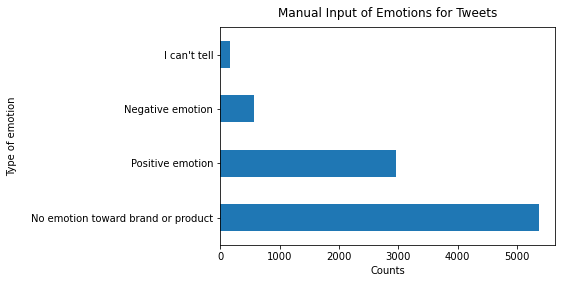

In [9]:
#we can see clearly that 'no emotion' is the most pervalent outcome for our target variable.
import matplotlib.pyplot as plt
df= df.convert_dtypes(str)
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts().plot(kind='barh', stacked = False,)
plt.xlabel("Counts")
plt.ylabel("Type of emotion", labelpad=14)
plt.title("Manual Input of Emotions for Tweets", y=1.02);


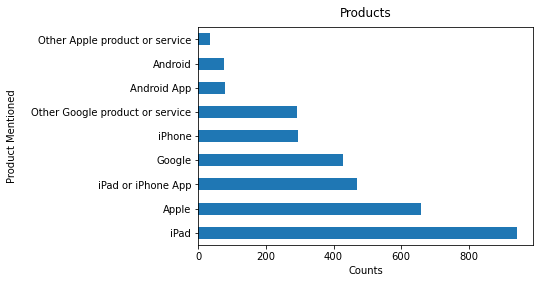

In [10]:
#this needs to be cleaned, furthermore we need to isolate some stuff
df.emotion_in_tweet_is_directed_at.value_counts().plot(kind='barh', stacked = False)
plt.xlabel("Counts")
plt.ylabel("Product Mentioned", labelpad=14)
plt.title("Products", y=1.02);

___________________

# More EDA

In [11]:
#lets look at iphone without regrex and based on conditionals 
df[df['tweet_text'].str.contains('iphone')|df['tweet_text'].str.contains('iPhone')]


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion
18,Just added my #SXSW flights to @planely. Match...,iPad or iPhone App,Positive emotion
...,...,...,...
9072,@mention your iPhone 4 cases are Rad and Ready...,iPhone,Positive emotion
9073,At #SXSW your iphone charger is your best friend.,<NA>,No emotion toward brand or product
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


SXSW in austin is the location for most of these tweets (as shown later) but we can see that certain names come up 

In [12]:
#this illustrates the ambuigity within NLP
df[df['tweet_text'].str.contains('marissa')|df['tweet_text'].str.contains('Marissa')]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
181,#sxsw day 1 - Marissa Mayer: Google Will Conne...,<NA>,No emotion toward brand or product
225,"google is about search, but local' marissa may...",<NA>,No emotion toward brand or product
355,Racing to ballroom D to see @mention Marissa M...,<NA>,No emotion toward brand or product
365,The quiet before the storm at #SXSW - Looking ...,<NA>,No emotion toward brand or product
...,...,...,...
8776,Bounced over to catch Google's Marissa Mayer s...,Google,Positive emotion
8787,Our interview w Marissa Mayer from #SXSW on Go...,<NA>,No emotion toward brand or product
8792,Really loving marissa mayer's presentation on ...,<NA>,No emotion toward brand or product
8881,I'll be tweeting out #SXSW sessions I'm going ...,<NA>,No emotion toward brand or product


In [13]:
#we will need to feed in the emotion_in_tweeet_is_directed_at due to the low count of the values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9065 entries, 0 to 9091
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9064 non-null   string
 1   emotion_in_tweet_is_directed_at                     3280 non-null   string
 2   is_there_an_emotion_directed_at_a_brand_or_product  9065 non-null   string
dtypes: string(3)
memory usage: 283.3 KB


In [14]:
#first get rid of any tweet_text nulls, an empty value is useless
print(df.tweet_text.isnull().any())


True


In [15]:
#locate nan
display(df[df['tweet_text'].isna()])
#delete because there is no value to the project

# Drop rows that has NaN values on selected columns
df=df.dropna(subset=['tweet_text'])

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6,<NA>,<NA>,No emotion toward brand or product


In [16]:
#this column is too ambiguous, through pd functions we can extract better columns
df.emotion_in_tweet_is_directed_at.value_counts()

iPad                               943
Apple                              659
iPad or iPhone App                 469
Google                             428
iPhone                             296
Other Google product or service    293
Android App                         80
Android                             77
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: Int64

In [17]:

#set everything to a string 
df = df.convert_dtypes(str)

### Goal 1: Fill in NAN values for unidentified objects in 'emotion_....directed_at'

In [18]:
#for these set of cells we will put the nan valuess as a placeholder stringer
#put in a placeholder so we can manipulate the columns
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].fillna('placeholder')

In [19]:
#check and assert 
df['emotion_in_tweet_is_directed_at'].isna().sum()

0

In [20]:
#ill find the conditional for this later, this will suffice for now 
df[df['tweet_text'].str.contains("app")] 
#lowercase the A in app in emotions_intweet_ col
df = df.replace('App','app ', regex=True)

In [21]:
#set the conditional by playing around with [ and ) till it works 
df.tweet_text[
   
    (df['emotion_in_tweet_is_directed_at'].str.contains("placeholder"))
]

5       @teachntech00 New iPad app s For #SpeechTherap...
16      Holler Gram for iPad on the iTunes app  Store ...
32      Attn: All  #SXSW frineds, @mention Register fo...
33          Anyone at  #sxsw want to sell their old iPad?
34      Anyone at  #SXSW who bought the new iPad want ...
                              ...                        
9086    Google says: want to give a lightning talk to ...
9087    @mention Yup, but I don't have a third app yet...
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
Name: tweet_text, Length: 5784, dtype: string

5784 tweets have nan values that are now replaced with 'placeholder'

In [22]:
#we need to clean this data up to include nan values so let's properly rename
#we choose nan_values because throughout the course of the project, we can always seperate the unaffected original
nan_values = df.copy()

Fixing the placeholders and imputting values based on the context of the tweet

In [23]:
import re

In [24]:
nan_values
#extract what we have observered to be missed NAN values that can be imputted
nan_values['ipad']= nan_values.tweet_text.str.contains('ipad', flags=re.IGNORECASE, case=False)
nan_values['iphone']= nan_values.tweet_text.str.contains('iphone', flags=re.IGNORECASE, case=False)
nan_values['apple']= nan_values.tweet_text.str.contains('apple',flags=re.IGNORECASE, case=False)
nan_values['google']= nan_values.tweet_text.str.contains('google',flags=re.IGNORECASE, case=False)
nan_values['android'] =nan_values.tweet_text.str.contains('android',flags=re.IGNORECASE, case=False)
nan_values['app'] =nan_values.tweet_text.str.contains('app',flags=re.IGNORECASE, case=False)

In [25]:
#set it up so that the boolean True is the name of the column and the boolean False is
nan_values['iphone'] = nan_values['iphone'].map({True: 'iphone', False: ','}) 
nan_values['ipad'] = nan_values['ipad'].map({True: 'ipad', False: ','}) 
nan_values['apple'] = nan_values['apple'].map({True: 'apple', False: ','}) 
nan_values['android'] = nan_values['android'].map({True: 'android', False: ','}) 
nan_values['google'] = nan_values['google'].map({True: 'google', False: ','}) 
nan_values['app'] = nan_values['app'].map({True: 'app', False: ','}) 

In [26]:
nan_values.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,ipad,iphone,apple,google,android,app
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,",",iphone,",",",",",",","
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone app,Positive emotion,ipad,iphone,",",",",",",app
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,ipad,",",",",",",",",","
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone app,Negative emotion,",",iphone,",",",",",",app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,",",",",",",google,",",","


In [27]:
#https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-pandas-datafra
#use this to canocate multiple columns and join all the rows
cols = ['ipad', 'google', 'android', 'apple', 'app', 'iphone']
nan_values['combined'] = nan_values[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [28]:
nan_values['combined'].value_counts()

,google,,,,               2307
ipad,,,,,                 1536
,,,,app,                  1024
ipad,,,app,                987
,,,,,iphone                785
,,,,,,                     698
,,,,appiphone              469
,,,appleapp,               243
,,android,,,               207
ipad,,appleapp,            175
,,android,app,             144
,,android,,iphone          114
,google,,app,              112
ipad,,,,iphone              84
,,android,appiphone         45
ipad,,,appiphone            40
ipad,android,,,             24
,googleandroid,,,           16
ipad,android,appiphone       9
ipadgoogle,,app,             8
,,,appleappiphone            8
,google,,,iphone             5
ipadgoogle,,,,               4
,,androidappleapp,           4
ipad,android,,iphone         4
,googleandroid,app,          4
ipadgoogle,,appiphone        2
ipad,,appleappiphone         2
,googleandroid,,iphone       2
ipad,android,app,            1
,google,appleapp,            1
Name: combined, dtype: int64

In [29]:
#698 rows will be dropped that have ,,,,,, (6) meaning that the string scrape didnt find much 
#MAKE SURE that it has a value of a placeholder as well through the conditional 
nan_values[nan_values['combined'].str.contains(",,,,,,") & nan_values['emotion_in_tweet_is_directed_at'].str.contains('placeholder')]


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,ipad,iphone,apple,google,android,app,combined
51,ÛÏ@mention {link} &lt;-- HELP ME FORWARD THIS...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
52,÷¼ WHAT? ÷_ {link} ã_ #edchat #musedchat #s...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
53,.@mention @mention on the location-based 'fast...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
66,At #sxsw? @mention / @mention wanna buy you a ...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
71,Chilcott: @mention #SXSW stand talking with Bl...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
...,...,...,...,...,...,...,...,...,...,...
8932,Z6: No News is Good News {link} [codes valid: ...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
8936,CLIENT NEWS! @mention Releases &quot;Dope Melo...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
8970,This is my 5th year downloading the #sxsw Musi...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
9024,"by the way, we're looking for a spanish-speaki...",placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"


In [30]:
#set the drop df 
nan_values_to_drop = nan_values[nan_values['combined'].str.contains(",,,,,,") & nan_values['emotion_in_tweet_is_directed_at'].str.contains('placeholder')].index

In [31]:
#drp[]
nan_values.drop(nan_values_to_drop, inplace=True)

In [32]:
pd.set_option('display.max_colwidth', None)
nan_values[nan_values['combined'] == 'ipad,android,appiphone'].tweet_text

546                                      The #SXSW GO app no available for Blackberry and Windows 7 in addition to iPhone, iPad, and Android: {link}
957                                              ÛÏ@mention Official #SXSW app  Û÷SXSW GOÛª {link} #android #iphone #ipadÛ &lt;thanks!installed
1545        @mention @mention @mention #Platformer CI di venues #SXSW pake 3 app 4sq API,D cnth : Tweetdeck etc (via : iPhone, Android, iPad and PC)
1708                                                                                 Official #SXSW app  Û÷SXSW GOÛª {link} #android #iphone #ipad
2699    Every game or app ad in the #SXSW Interactive guide shows either an iPhone or iPad. AT&amp;T &amp; SXSW's two promos show WP7 &amp; Android.
6397                                                                     RT @mention Official #SXSW app  Û÷SXSW GOÛª {link} #android #iphone #ipad
6398                                                              RT @mention Official #SXSW app  Û÷SXSW 

Goal 1: We now have a combined value that we can search up for positive, negative and neutral tweets 
 ________________________________________________________________ 


Goal 2: create the proper stopwords, lemment, and other cleaning needed for NLP

In [33]:
#always reconvert
nan_values = nan_values.convert_dtypes(str)


In [34]:
#https://www.cogsci.ed.ac.uk/~richard/utf-8.cgi?input=%25C3%2596&mode=char
#used to identify hex values 
nan_values2=nan_values[nan_values['tweet_text'].str.contains('\x89')].index
nan_values.drop(nan_values2, inplace=True)



In [35]:
import re
import nltk
from nltk import pos_tag#a must need in order for the rest of the packages to work 
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer #three different type of tokenizers that we may use 
from nltk.corpus import stopwords, wordnet# need
from nltk.stem import WordNetLemmatizer #need

In [36]:
#https://github.com/sharmaroshan/Twitter-Sentiment-Analysis/blob/master/LICENSE
#under license provided, this code was supplied by the NLTK library and github owner above
#adjustments made by me are highlighted. 
sw = stopwords.words('english')
sw.extend(['link', 'rt', 'sxsw', 'le'])
#added all punctuation, made sure # and @ wasnt in there
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~“!'
twitter_re = re.compile('[#@][a-zA-Z]*')
num_re = re.compile('^\d{1}$')
hashtags = re.compile ("#([a-zA-Z0-9_]{1,50})")

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def txt_clean(txt, stop_words=sw):
    # takes in a string and returns a cleaned up string ready for count or tfidf vectorizing
    
    # splitting the text up into words
    t = txt.split(' ')
    # turning the words lowercase
    t = [w.lower() for w in t]
    # removing punctuation
    t = [w.translate(w.maketrans('','', punctuation)) for w in t]
    # removing @'s and #'s which are twitter jargon
    t = [w for w in t if not twitter_re.match(w)]
    t = [w for w in t if not hashtags.match(w)]

    # removing leftover numbers
    t = [w for w in t if not num_re.match(w)]
    # removing stop words and more twitter jargon
    t = [w for w in t if w not in stop_words]
    # removing empty strings
    t = [w for w in t if w]
    
    # word lemmatizing
    t = pos_tag(t)
    t = [(w[0], get_wordnet_pos(w[1])) for w in t]
    lem = WordNetLemmatizer()
    t = [lem.lemmatize(w[0], w[1]) for w in t]
    # joining all the strings together into one
    return ' '.join(t)

nan_values['tweet_text'] = nan_values['tweet_text'].map(txt_clean)

In [37]:
#do some extra punctuation
nan_values=nan_values.convert_dtypes(str)
nan_values= nan_values.apply(lambda x: x.replace('"', ''))

In [38]:
#do some URL cleaning
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
nan_values['tweet_text'] = nan_values['tweet_text'].apply(lambda x: cleaning_URLs(x))


________________________________

Goal 3: Redo sentiment via VADER

In [39]:
#import and dl proper lexicon
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
#what you would use to install
#!pip install vaderSentiment

In [41]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):

    #The sentimentintensity analyzer classifier is used to rate the polarity of the sentance from highly negative to highly positive

    sid_obj = SentimentIntensityAnalyzer()
    #obtain sentance and find the score via the polarity_score fx 
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    #if compound = 0 then it is neutral, -1 = negative, + 1 positive. the value we assign to compound/positive/negative is beyond the scope of this project.
    #if rated at least 5% positive then it is positive and the same for negative, anywhere in between and it's neutral.

    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
        return "Negative"
 
    else :
        return "Neutral"
 


In [42]:
nan_values = nan_values.convert_dtypes(str)

In [43]:
#map it
nan_values['.05 threshold sentiment values'] = nan_values['tweet_text'].map(sentiment_scores)

In [44]:
nan_values.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()



No emotion toward brand or product    4469
Positive emotion                      2838
Negative emotion                       543
I can't tell                           146
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: Int64

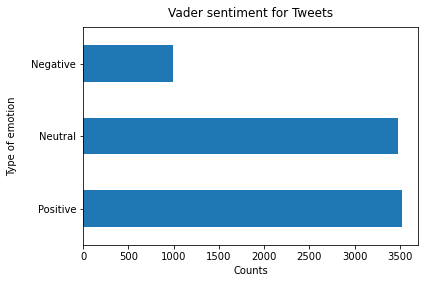

In [45]:
#these values help alleviate the class disparity and get rid of 'i cant tell'
nan_values['.05 threshold sentiment values'].value_counts().plot(kind = 'barh')
plt.xlabel("Counts")
plt.ylabel("Type of emotion", labelpad=14)
plt.title("Vader sentiment for Tweets", y=1.02);

We can clearly see that using ths gives more negative emotion, thus fixing the imbalance class issue and making neutral/positive less dominant in the df.

In [46]:
nan_values = nan_values.convert_dtypes(str)

We now can see that we took care of the I cant tell group and rearranged the tweets to give the minority class some more impact organically. 

Models

In [47]:
#create a tokenized version
import nltk 
#nltk.download('punkt')
nan_values['tokenized']= nan_values.tweet_text.map(lambda x: word_tokenize(x))

In [48]:
nan_values['tokenized']

0                                                                   [3g, iphone, hr, tweet, dead, need, upgrade, plugin, station]
1                                [know, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, give, free, t]
2                                                                                                              [wait, also, sale]
3                                                                         [hope, year, festival, isnt, crashy, year, iphone, app]
4              [great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]
                                                                  ...                                                            
9087                                                                    [yup, dont, third, app, yet, im, android, suggestion, cc]
9088                                                                                      

In [49]:
#find and delete
nan_values[nan_values['tweet_text'].str.contains('\x89')]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,ipad,iphone,apple,google,android,app,combined,.05 threshold sentiment values,tokenized


In [50]:
nan_values=nan_values.convert_dtypes(str)

Count vectorization and TF-IDF 

Text(0.5, 1.02, 'Word analysis through Count Vectorization')

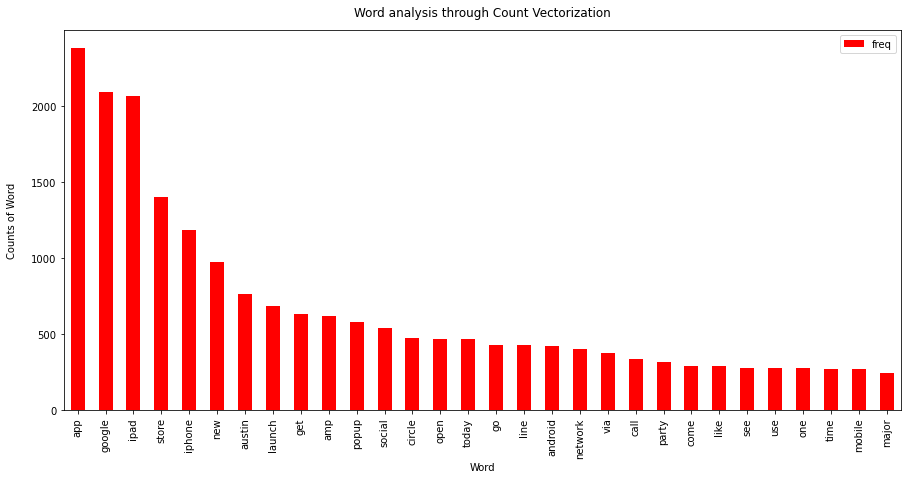

In [51]:
#obtained and adjusted from flatiron
from sklearn.feature_extraction.text import CountVectorizer
#set X to encompass all tweet_text 
X = nan_values['tweet_text']


#use the CV classifier to pass the column without a tokenizer, preprocessor and set lowercase=False 
cv = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             lowercase=False)
#creates a sparse matrix
words = cv.fit_transform(X)
#add all the values into a variable called sum_words
sum_words = words.sum(axis=0)

#for every word in cv.vocabulary.items (which returns a list), add it to the unique count
#gives off a list of tuples' (item',count) that resembles a pd
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
#sort by ascending order
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create the df
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
#use iloc next time
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.xlabel("Word")
plt.ylabel("Counts of Word", labelpad=14)
plt.title("Word analysis through Count Vectorization", y=1.02)


From this model we are able to tell that the most popular words amongst that dataset was that there was a new launch at austin. Amp popup and social circle may be associate with some reviews. 

In [ ]:
#!pip install WordCloud

Text(0.5, 1.0, 'Most common words in tweets')

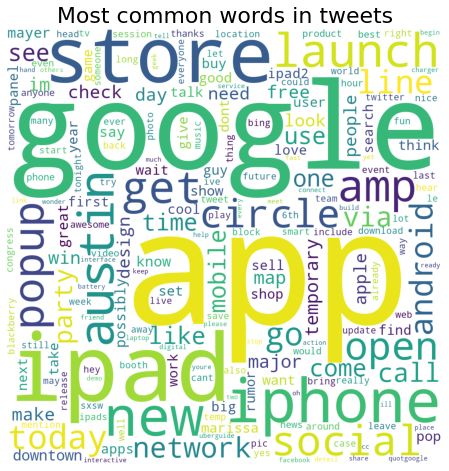

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most common words in tweets", fontsize = 22)

In [53]:
#negative words about google 
from PIL import Image
twitter_mask = np.array(Image.open("twitter_mask2.png"))
#Negative_emotions =' '.join([text for text in nan_values['tweet_text'][nan_values['combined'].str.contains("google", regex=True)][nan_values['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']])
microsoft =' '.join([text for text in nan_values['tweet_text'][nan_values['tweet_text'].str.contains("microsoft", regex=True)]])


In [57]:
#idea to remove comes from this source: https://stackoverflow.com/questions/44826282/python-how-to-remove-words-from-a-string
microsoft#this is a one long string


removal_list = ["microsoft"]

edit_string_as_list = microsoft.split()

final_list = [word for word in edit_string_as_list if word not in removal_list]

final_string = ' '.join(final_list)



In [59]:
final_string

'texas amaze ive meet many influential people work twitter foursquare even app quotthe future touch user interface designquot wonder presentation employee mention ipad google app ea game zynga facebook intuit go gaga go game get drunk change iphone default search yahoo go launch ie9 amid glow app logo app selfish brand serve brand well#sxsw fast company google app ea game zynga facebook intuit go gaga go game funny psfk session sponsor talk app line longer 311 temp app store ipad2 314 booth ie9 yeah right tweet use apple microsofts dpe b sxswi amp tweet amp killer meet ups new old friend today app solo killer many get iphone android app come see booth ill give token free entry marketplace 99 monetization access fire hose tweet individual business deal google yahoo play risk ipad booth rep talk bbc reporter kinect transdevice connectivity html5 app lemicrosoft likely javascript integration browser compete collaborate system amoral mission round table twitter google dell icm lose hour to

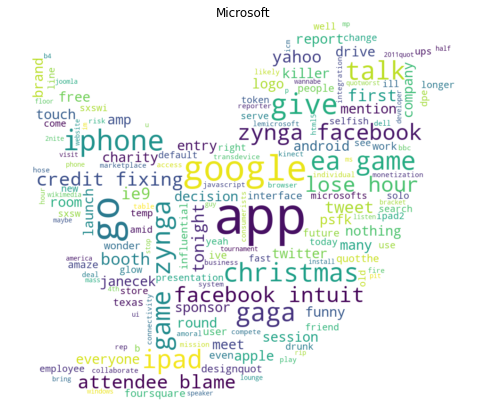

In [60]:

wordcloud = WordCloud(background_color = 'white', width=800, height=500, mask=twitter_mask, random_state = 0, max_font_size = 110).generate(final_string)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Microsoft')
plt.show()



In [61]:
#comparing with  nan_values['.05 threshold sentiment values']

#negative words about google 
from PIL import Image
twitter_mask = np.array(Image.open("twitter_mask2.png"))
Negative_emotions =' '.join([text for text in nan_values['tweet_text'][nan_values['combined'].str.contains("google", regex=True)][nan_values['.05 threshold sentiment values'] == 'Negative']])


In [62]:
removal_list = ["google"]

edit_string_as_list = Negative_emotions.split()

final_list = [word for word in edit_string_as_list if word not in removal_list]

final_string = ' '.join(final_list)

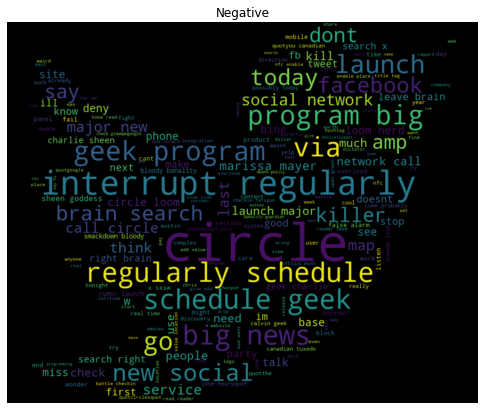

In [64]:

wordcloud = WordCloud(background_color = 'black', width=800, height=500, mask=twitter_mask, random_state = 0, max_font_size = 110).generate(final_string)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Negative')
plt.show()



In [ ]:
#Negative_emotions

In [65]:
positive_emotions =' '.join([text for text in nan_values['tweet_text'] [nan_values['combined'].str.contains("google", regex=True)][nan_values['combined'].str.contains("app", regex=True)][nan_values['.05 threshold sentiment values'] == 'Positive']])


In [66]:
removal_list = ["google"]

edit_string_as_list = positive_emotions.split()

final_list = [word for word in edit_string_as_list if word not in removal_list]

final_string = ' '.join(final_list)



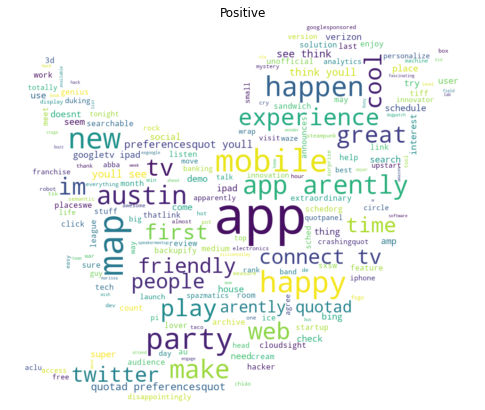

In [67]:

wordcloud = WordCloud(background_color = 'white', width=800, height=500,mask=twitter_mask, random_state = 0, max_font_size = 110).generate(final_string)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive')
plt.show()



In [68]:

normal_words =' '.join([text for text in nan_values['tweet_text'][nan_values['combined'].str.contains("google", regex=True)][nan_values['.05 threshold sentiment values'] == 'Neutral']])


In [70]:
removal_list = ["google"]

normal_words = normal_words.split()

final_list = [word for word in normal_words if word not in removal_list]

final_string = ' '.join(final_list)

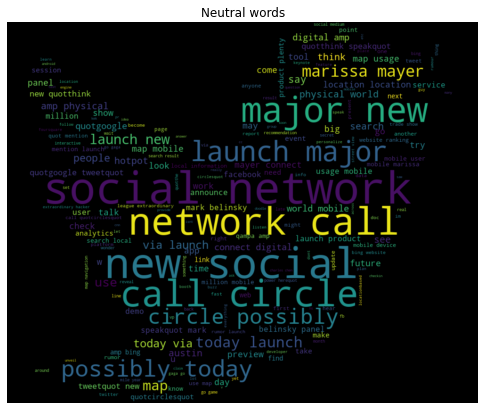

In [72]:

wordcloud = WordCloud(width=800, height=500, mask=twitter_mask, random_state = 0, max_font_size = 110).generate(final_string)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Neutral words')
plt.show()


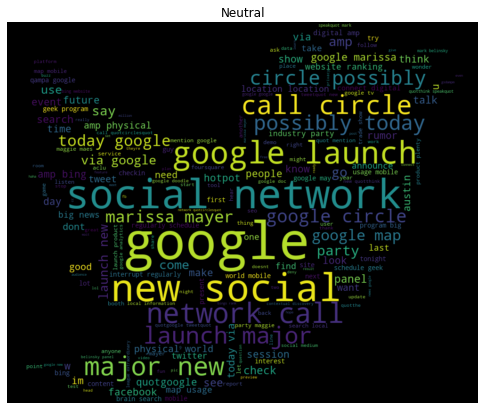

In [73]:

normal_words =' '.join([text for text in nan_values['tweet_text'][nan_values['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product'][nan_values['combined'] == ',google,,,,']])

wordcloud = WordCloud(width=800, height=500, random_state = 0,mask=twitter_mask, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Neutral')
plt.show()


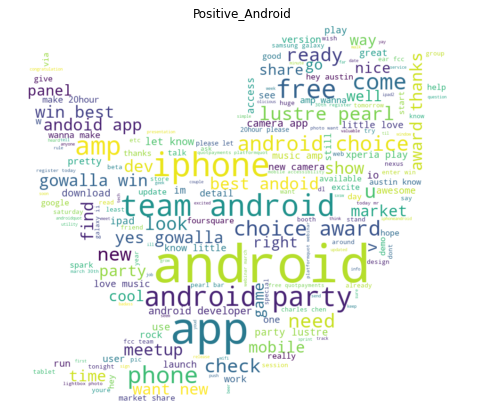

In [74]:
positive_emotions =' '.join([text for text in nan_values['tweet_text'] [nan_values['combined'].str.contains("android", regex=True)][nan_values['.05 threshold sentiment values'] == 'Positive']])

wordcloud = WordCloud(background_color = 'white', width=800, height=500,mask=twitter_mask, random_state = 0, max_font_size = 110).generate(positive_emotions)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive_Android')
plt.show()



# Modeling
_________________

In [75]:
#redo this into values
nan_values['.05 threshold sentiment values'].value_counts()                                                             

Positive    3521
Neutral     3477
Negative     998
Name: .05 threshold sentiment values, dtype: Int64

In [76]:
# like this 
nan_values['.05 threshold sentiment values'] = nan_values['.05 threshold sentiment values'].str.replace('Negative', '1') 
nan_values['.05 threshold sentiment values'] = nan_values['.05 threshold sentiment values'].str.replace('Positive', '3')
nan_values['.05 threshold sentiment values'] = nan_values['.05 threshold sentiment values'].str.replace('Neutral', '2')

In [77]:
nan_values['.05 threshold sentiment values'].head()

0    1
1    3
2    2
3    3
4    3
Name: .05 threshold sentiment values, dtype: string

In [78]:

from sklearn.model_selection import train_test_split
X= None
y = None 
X= nan_values['tweet_text']
y= nan_values['.05 threshold sentiment values']
X_t, X_val, y_t, y_val = train_test_split(X, y,
                                          test_size=0.25, random_state=42)

In [79]:
# tuse tfidf vec with ngram range(2,2)
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(ngram_range=(1,2))
X_t = v.fit_transform(X_t)
X_val = v.transform(X_val)

In [80]:
X_t = pd.DataFrame(X_t.toarray(), columns = v.get_feature_names())
X_t
#we see these values but they are encoding errors and I cannot get rid of them

,0310,0310 weve,0310apple,031111,031111 cover,10,10 app,10 attendee,10 austin,10 business,...,åè,åè ubersoc,çü,çü ¼¼,èï,èï öý,öý,öý çü,ûârt,ûârt get
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
v.vocabulary_

{'group': 12640,
 'next': 20228,
 'ppl': 22655,
 'table': 28350,
 'everyone': 9322,
 'use': 30710,
 'thier': 29100,
 'phoneipad': 21963,
 'instead': 14661,
 'take': 28396,
 'group next': 12652,
 'next ppl': 20267,
 'ppl table': 22668,
 'table everyone': 28352,
 'everyone use': 9350,
 'use thier': 30796,
 'thier phoneipad': 29101,
 'phoneipad instead': 21964,
 'instead take': 14671,
 'watch': 31513,
 'dj': 8182,
 'rock': 24833,
 'check': 5475,
 'watch dj': 31521,
 'dj rock': 8188,
 'rock check': 24837,
 'launch': 16781,
 'imminent': 14358,
 'apparently': 2515,
 'google': 11978,
 'circle': 5699,
 'probably': 22916,
 'wont': 32275,
 'dì': 8678,
 'but': 4836,
 'even': 9191,
 'launch imminent': 16824,
 'imminent apparently': 14359,
 'apparently google': 2516,
 'google circle': 12046,
 'circle probably': 5761,
 'probably wont': 22934,
 'wont dì': 32278,
 'dì but': 8679,
 'but even': 4837,
 'best': 3923,
 'thing': 29105,
 'ive': 16014,
 'heard': 13296,
 'weekend': 31768,
 'quoti': 23584,
 'gi

looking at this, we will move forward with 1,2 ngrams

In [82]:
X=None
y=None
X= nan_values.tweet_text
y=nan_values['.05 threshold sentiment values']

In [83]:
#set the regular X-train, test and y
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25)

In [84]:
#make X an conglomerate from X train
token_docs=[txt_clean(doc,sw) for doc in X_train]

In [85]:
#rebuild using token docs as our X train as we did in the code above 
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train,
                                          test_size=0.25, random_state=42)

In [86]:
#starting with CV max 5 
cv = CountVectorizer(max_features=5)
#code adapted from flatiron but refer to project 2 from this user
X_t_vec = cv.fit_transform(X_t)
X_t_vec = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

In [87]:
X_t_vec

,app,google,ipad,iphone,store
1977,0,0,1,0,0
1560,0,0,0,1,0
1480,1,0,1,0,0
6949,0,0,1,0,0
2667,0,0,0,1,0
...,...,...,...,...,...
364,0,0,0,1,0
6327,1,0,0,0,0
3041,0,0,1,0,0
722,0,0,0,1,0


In [88]:
# transform validation set 
X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [89]:
from collections import defaultdict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [90]:
mnb = MultinomialNB()
mnb.fit(X_t_vec, y_t)

MultinomialNB()

In [91]:
#What should our priors for each class be?
prior_2 = y_t.value_counts()[2]/len(y_t)
prior_1 = y_t.value_counts()[1]/len(y_t)
prior_0 = y_t.value_counts()[0]/len(y_t)
print(prior_0, prior_1, prior_2)

0.44251723371136314 0.4313987102512786 0.12608405603735823


In [92]:
mnb.class_count_

array([ 567., 1940., 1990.])

In [93]:
mnb.class_log_prior_

array([-2.07080648, -0.84072253, -0.81527587])

In [94]:
mnb.feature_count_

array([[137., 125., 156., 125.,  87.],
       [626., 571., 494., 229., 466.],
       [586., 460., 553., 312., 238.]])

In [95]:
mnb.n_features_in_

5

In [96]:
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.4806666666666667

In [97]:
cm = confusion_matrix(y_val, y_hat)
cm


array([[  0,  58, 127],
       [  0, 316, 361],
       [  0, 233, 405]], dtype=int64)

In [98]:
accuracy_score(y_val, y_hat)

0.4806666666666667

Initial model fails due to low accuracy.
Count vectorization shows us that manually adjusting the max features is not feasible without more insight into the data.

In [99]:
#this time CV without parameters
cv = CountVectorizer()
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)


X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [100]:
#we can clearly see that the result of this is great with just preprocessing, no tuning was needed yet 
mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)
#accuracy score because we need something else for a 3 x 3 matrixc 
accuracy_score(y_val, y_hat)

0.7706666666666667

In [101]:
precision_score(y_val, y_hat, average='weighted')

0.7762838639509774

In [102]:
len(cv.vocabulary_)

5896

In [103]:
#lets try using min/max df for corpus specific stop words
#https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
#min_df = removes infrequent terms= 0.05 means "ignore terms that appear in less than 5% of the documents".
#max_df = .95 means "ignore terms that appear in more than 95% documents".
cv = CountVectorizer(min_df=0.05, max_df=0.95)
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)

accuracy_score(y_val, y_hat)

0.516

TDIF vec + MNB

In [104]:
#experiment with the ngram range
tfidf = TfidfVectorizer(ngram_range=(2,2))
X_t_vec = tfidf.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(tfidf.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

X_val_vec = tfidf.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(tfidf.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)

accuracy_score(y_val, y_hat)

0.6606666666666666

This is a lower accuracy than the CV- thus it makes sense to improve the parameters. We are using TFIDF because if we pass count vectorization as just a bag of words into MNB then each word would be alloted an arbitrary weight.

In [105]:
tfidf = TfidfVectorizer(ngram_range=(1,10))
X_t_vec = tfidf.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(tfidf.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

X_val_vec = tfidf.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(tfidf.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.7453333333333333

We adjusted the ngram range to fit 1-10 because we want a variety of meaningful phrases for future usage

In [106]:
# In standard binary regression scenario the models give you probability of observing the "success" category. In multinomial case, the models return probabilities of observing each of the outcomes.
# Log probabilities are simply natural logarithms of the predicted probabilities.
#https://stats.stackexchange.com/questions/266031/what-is-log-probability-of-feature-in-sklearn-multinomialnb
mnb.class_log_prior_

array([-2.07080648, -0.84072253, -0.81527587])

This model predicts the following

12.22% negative

43.14% neutral 

44.25% positive 

Which is exactly how the Vader sentiments were distributed

In [107]:
mnb.n_features_in_

132487

In [108]:
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.7453333333333333

In [109]:
cm = confusion_matrix(y_val, y_hat)
cm_df = pd.DataFrame(cm,
                    index= [1,2,3],
                    columns = [1,2,3])

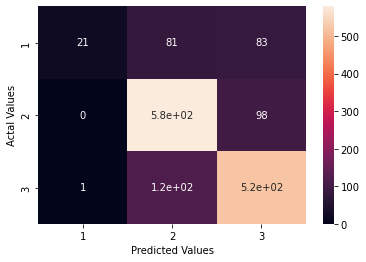

In [110]:
#Plotting the confusion matrix
import seaborn as sns
sns.heatmap(cm_df, annot=True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [111]:
precision_score(y_val, y_hat, average='weighted')

0.7683825005942114

This model is a bit skewed to predict more polarized tweets, but can be adjusted with the [compound] of the VADER class.

The probability of a tweet being an positive, when its actually netural is 1200/5200 + 1200: which means that 18.75% of all positive tweets will be predicted as neutral. Thus it helps balances some of the class imbalance problems exhibited earlier. The more tweets we can feed into this model the better the +, -, o, prediction our model can behave as it becomes more balanced. 


The analyzer was also better than the crowdsourced sentiment because of bias (it might not have had a universal rater throughout that set). Thus using vader was justified. 

We can now talk about buisness strategies that may benefit google based on the EDA done to build this model. 

# Discussion

Due to the decent accuracy, I would say that it is possible that the EDA statements made below are true. 


Positive tweets surrounding the android platform are that it is free, cool and apparently  a team feature.

- The team feature is distinguishable from other web conferemce platforms. Thus money can be invested into it for it to grow, we would like to know what particular features of the team can be improved on most effficiently

Tweets that were deemed neutral and surround google talk about: circle, social networking, "new social".
- These terms may indicate that current devices are good at social networking, perhaps the circle app is one that google can improve on.

Negative tweets that also surround google include: circle, schedules, facebook, network calling and how it is interrupted regularly. 
- Obviously these terms show us a few insights about the tweets
        - The Circle app can definitely be refined on in terms of scheduling aspects of the app.
        - Accessibility to facebook may require some UI bug fixes
        - Network calling, with a high probability to avoid foreign collect calls, may need improvement on- as it is free and as a company, google would like to keep it that way.

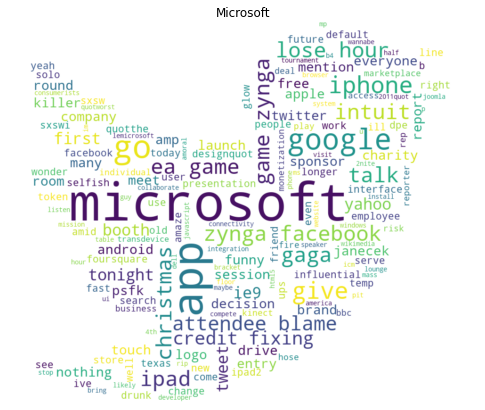

In [112]:
#This leads us to investigate back to the eda 
#negative words about google 
import numpy as np
from PIL import Image
twitter_mask = np.array(Image.open("twitter_mask2.png"))
#Negative_emotions =' '.join([text for text in nan_values['tweet_text'][nan_values['combined'].str.contains("google", regex=True)][nan_values['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']])
microsoft =' '.join([text for text in nan_values['tweet_text'][nan_values['tweet_text'].str.contains("microsoft", regex=True)]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, mask=twitter_mask, random_state = 0, max_font_size = 110).generate(microsoft)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Microsoft')
plt.show()



The above image is a clear indication that these tweets may refer to different sectors of other companies that make the tweet ambigious.

In a WordCloud about microsoft we already see conflicting associations with google, thus more investigation is necessary to seperate and compartamentalize the ['combined'] column further. However, methods to infer the ['object'] being referred to are very limited. 

Now we also see EA games, and lady gaga being affected by diverging the data further when we are very specific about our search. In conclusion, we should reinvestigate the EDA, pull out the hashtags if needed and scrape more data for making google a better company through sentiment analysis.

Thank you